In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data=np.genfromtxt('mnist_train.csv',delimiter=',')
data.shape

(7000, 785)

In [55]:
data=data[:,1:]
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

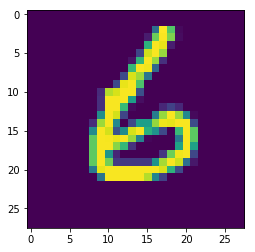

In [56]:
test=data[0]
test = (np.reshape(test, (28, 28))).astype(np.uint8)
plt.imshow(test)

In [80]:
class neural_net:
    def __init__(self,num_hidden_layers,num_neuron,learning_rate):
        self.num_input=7000
        self.dimension=784
        self.out=10
        self.layers=[]
        self.bias=[]
        self.weights=[]
        self.num_hidden_layers=num_hidden_layers
        self.num_neuron=num_neuron
        self.learning_rate=learning_rate
        self.d_layers=[]
        self.d_weights=[]
        self.d_bias=[]
        self.x_train=np.zeros((7000,784))
        self.y_train=np.zeros(7000)
        self.y_train_hot=np.zeros((7000,10))
    def relu(self,x):
        return np.maximum(0,x)
    def getdata(self):
        data=np.genfromtxt('mnist_train.csv',delimiter=',')
        self.y_train=data[:,0]
        self.x_train=data[:,1:]/255
        self.y_train=self.y_train.astype(int)
        self.y_train_hot[range(self.num_input),self.y_train]=1
    def weight_initialze(self):
        self.getdata()
        alpha=0.1
        W=alpha*np.random.randn(self.dimension,self.num_neuron)
        self.weights.append(W)
        b=np.zeros((1,self.num_neuron))
        self.bias.append(b)
        for i in range(1,self.num_hidden_layers):
            W=alpha*np.random.randn(self.num_neuron,self.num_neuron)
            self.weights.append(W)
            b=np.zeros((1,self.num_neuron))
            self.bias.append(b)
        W=alpha*np.random.randn(self.num_neuron,self.out)
        self.weights.append(W)
        b=np.zeros((1,self.out))
        self.bias.append(b)      
    def forward(self):
        j=0
        self.layers=[]
        self.layers.append(np.dot(self.x_train,self.weights[j])+self.bias[j])
        for i in range(1,self.num_hidden_layers):
            j+=1
            self.layers.append(self.relu((np.dot(self.layers[j-1],self.weights[j])+self.bias[j])))
        x=np.exp((np.dot(self.layers[j],self.weights[j+1]))+self.bias[j+1])
        x=x/np.sum(x,axis=1,keepdims=True)
        self.layers.append(x)
    def back(self):
        j=0
        k=self.num_hidden_layers
        self.d_layers=[]
        self.d_weights=[]
        self.d_bias=[]
        self.d_layers.append((self.layers[k]-self.y_train_hot)/self.num_input)
        self.d_weights.append(np.dot((self.layers[k-1]).T,self.d_layers[j]))
        self.d_bias.append(np.sum(self.d_layers[j],axis=0,keepdims=True))
        for i in range(1,self.num_hidden_layers):
            j+=1
            self.d_layers.append(np.dot(self.d_layers[j-1],(self.weights[k]).T))
            W=self.d_layers[j]
            W[self.layers[k-1]<=0]=0
            self.d_layers[j]=W
            k-=1
            self.d_weights.append(np.dot((self.layers[k-1]).T,self.d_layers[j]))
            self.d_bias.append(np.sum(self.d_layers[j],axis=0,keepdims=True))
        self.d_layers.append(np.dot(self.d_layers[j],(self.weights[k]).T))
        self.d_weights.append(np.dot((self.x_train).T,self.d_layers[j+1]))
        self.d_bias.append(np.sum(self.d_layers[j+1],axis=0,keepdims=True))
    def weight_updation(self):
        k=self.num_hidden_layers
        for i in range(self.num_hidden_layers):
            self.weights[i]+=-self.learning_rate*self.d_weights[k]
            self.bias[i]+=-self.learning_rate*self.d_bias[k]
            k=k-1
    def error(self):
        loss=0.5*np.sum(np.square((self.layers[self.num_hidden]-self.Y_train_hot)))/7000
        return (loss)
    def train(self):
        epoch=1000           # change the epochs to see the variation
        self.weight_initialze()
        for i in range(epoch):
            self.forward()
            self.back()
            self.weight_updation()

In [81]:
a=neural_net(3,300,.1)
a.train()

In [61]:
class NeuralNet:
    def __init__(self,num_hidden,num_neuron,learning_rate):
        self.num_input=7000                  #took the 7000 samples given for training
        self.dimension=784
        self.num_out=10                      #output is 10 classes
        self.layers=[]
        self.weights=[]
        self.bias=[]
        self.num_hidden=num_hidden
        self.num_neuron=num_neuron
        self.learning_rate=learning_rate
        self.X_train=np.zeros((7000,784))
        self.Y_train=np.zeros(7000)
        self.d_weights=[]
        self.d_bias=[]
        self.d_layers=[]
        self.Y_train_hot=np.zeros((7000,10))

    def relu(self,x):                         #relu for nonlinearity
        return np.maximum(0,x)

    def get_data(self):                       # getting the data
        Data= np.genfromtxt(r'mnist_train.csv', delimiter=',')
        self.Y_train=Data[:,0]
        self.X_train=Data[:,1:]/255
        self.Y_train=self.Y_train.astype(int)
        self.Y_train_hot[range(self.num_input),self.Y_train]=1          #one hot representation of training examples

    def weight_inialization(self):           #initialising the weights for each layer performance can change with values of alpha
        self.get_data()
        alpha=.1
        W=alpha*np.random.randn(self.dimension,self.num_neuron)
        self.weights.append(W)
        b=np.zeros((1,self.num_neuron))
        self.bias.append(b)
        for i in range(1,self.num_hidden):
            W=alpha*np.random.randn(self.num_neuron,self.num_neuron)
            self.weights.append(W)
            b=np.zeros((1,self.num_neuron))
            self.bias.append(b)
        W=alpha*np.random.randn(self.num_neuron,self.num_out)
        self.weights.append(W)
        b=np.zeros((1,self.num_out))
        self.bias.append(b)

    def forward_pass(self):                 #normal forward pass
        j=0
        self.layers=[]
        self.layers.append(np.dot(self.X_train,self.weights[j])+self.bias[j])
        for i in range(1,self.num_hidden):
            j=j+1
            self.layers.append(self.relu((np.dot(self.layers[j-1],self.weights[j])+self.bias[j])))
        x=np.exp((np.dot(self.layers[j],self.weights[j+1]))+self.bias[j+1])
        x=x/np.sum(x,axis=1,keepdims=True)
        self.layers.append(x)

    def back_pass(self):                   #backprop
        j=0
        k=self.num_hidden
        self.d_layers=[]
        self.d_weights=[]
        self.d_bias=[]                                                           #first layer and last layer backprop have to explicitly written
        self.d_layers.append((self.layers[k]-self.Y_train_hot)/self.num_input)
        self.d_weights.append(np.dot((self.layers[k-1]).T,self.d_layers[j]))
        self.d_bias.append(np.sum(self.d_layers[j],axis=0,keepdims=True))
        for i in range(1,self.num_hidden):
            j=j+1
            self.d_layers.append(np.dot(self.d_layers[j-1],(self.weights[k]).T))
            W=self.d_layers[j]
            W[self.layers[k-1]<=0]=0
            self.d_layers[j]=W
            k=k-1
            self.d_weights.append(np.dot((self.layers[k-1]).T,self.d_layers[j]))
            self.d_bias.append(np.sum(self.d_layers[j],axis=0,keepdims=True))
        self.d_layers.append(np.dot(self.d_layers[j],(self.weights[k]).T))
        self.d_weights.append(np.dot((self.X_train).T,self.d_layers[j+1]))
        self.d_bias.append(np.sum(self.d_layers[j+1],axis=0,keepdims=True))

    def weight_updation(self):      #updating the weight
        k=self.num_hidden
        for i in range(self.num_hidden):
            self.weights[i]+=-self.learning_rate*self.d_weights[k]
            self.bias[i]+=-self.learning_rate*self.d_bias[k]
            k=k-1

    def error(self):
        loss=0.5*np.sum(np.square((self.layers[self.num_hidden]-self.Y_train_hot)))/7000
        return (loss)

    def accuracy(self):
        count=0
        predicted=np.argmax(self.layers[self.num_hidden],axis=1)
        for i in range(self.num_input):
            if(predicted[i]==self.Y_train[i]):
                count+=1
        count=count/self.num_input
        print(count)

    def train(self):
        epoch=1000           # change the epochs to see the variation
        self.weight_inialization()
        for i in range(epoch):
            self.forward_pass()
            self.back_pass()
            self.weight_updation()
            #print(self.error())

    def test(self):
        test_data= np.genfromtxt(r'C:\Users\hari\ml_assignment\mnist_test.csv', delimiter=',')
        test_data=test_data/255
        j=0
        self.layers=[]
        self.layers.append(np.dot(test_data,self.weights[j])+self.bias[j])
        for i in range(1,self.num_hidden):
            j=j+1
            self.layers.append(self.relu((np.dot(self.layers[j-1],self.weights[j])+self.bias[j])))
        x=np.exp((np.dot(self.layers[j],self.weights[j+1]))+self.bias[j+1])
        x=x/np.sum(x,axis=1,keepdims=True)
        self.layers.append(x)
        predicted=np.argmax(self.layers[self.num_hidden],axis=1)
        predicted=predicted.astype(int)
        np.savetxt("test_result.csv", predicted, fmt='%10.0f', delimiter='\t')

In [64]:
Net1=NeuralNet(2,300,.1) #declare as NeuralNet(number of hidden layers,number of neurons in hidden layer,learning rate)
Net1.train()
Net1.accuracy()           #acuuracy in training_set
Net1.test()

In [65]:
Net1.accuracy()           #acuuracy in training_set

0.9901428571428571
